# Bankruptcy dataset visualisation

The goal of this notebook is to explore by different ways the companies' bankruptcy data, analyse the general behavior of data and all form of correlation between the variables and finally to know what variables are useless and have to be ejected.

## Libraries and dataset import

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dirpath = Path('../data/extension/csv')
lstfile = list(dirpath.glob('*year.csv'))
lstfile

[WindowsPath('../data/extension/csv/1year.csv'),
 WindowsPath('../data/extension/csv/2year.csv'),
 WindowsPath('../data/extension/csv/3year.csv'),
 WindowsPath('../data/extension/csv/4year.csv'),
 WindowsPath('../data/extension/csv/5year.csv')]

In [3]:
dataset = {i.stem:pd.read_csv(i) for i in lstfile}
shapes = {x:y.shape for x, y in dataset.items()}
shapes

{'1year': (7026, 65),
 '2year': (10172, 65),
 '3year': (10502, 65),
 '4year': (9791, 65),
 '5year': (5909, 65)}

## Dataset study

#### Data company repartition

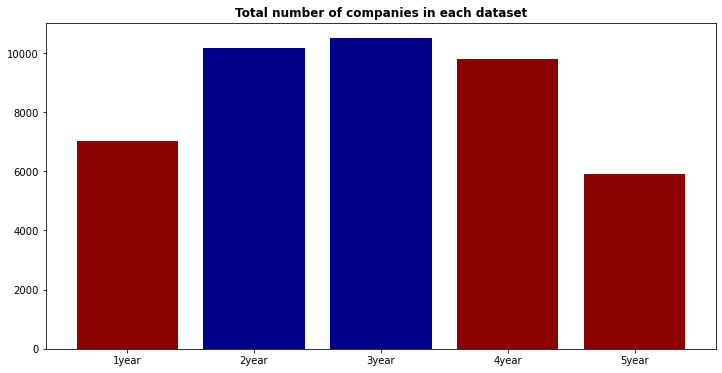

In [4]:
plt.figure(figsize=(12,6))
plt.title('Total number of companies in each dataset', fontweight='bold')
ax = plt.bar(shapes.keys(), [s[0] for s in shapes.values()], 
             color=['darkred' if s[0] < 10000 else 'darkblue' for  s in shapes.values()])

In [5]:
bankruptcy = pd.concat([x.X65.value_counts() for x in dataset.values()], axis=1, ignore_index=True)
bankruptcy.columns = dataset.keys()
bankruptcy.index = ['no bankrupted', 'bankrupted']
bankruptcy

,1year,2year,3year,4year,5year
no bankrupted,6755,9772,10007,9276,5499
bankrupted,271,400,495,515,410


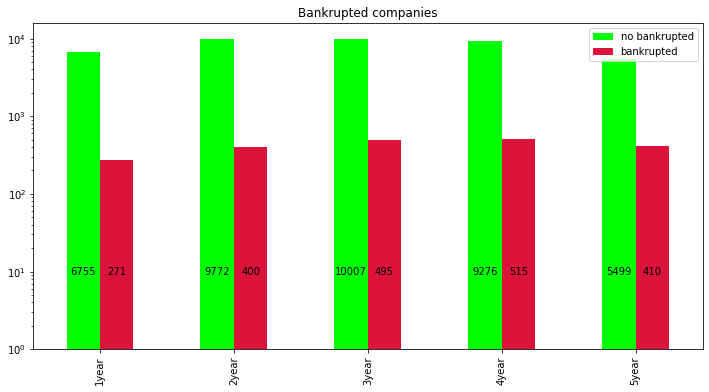

In [6]:
ax = bankruptcy.T.plot.bar(log=True, color=['lime','crimson'], figsize=(12,6), title='Bankrupted companies')
for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2., 10), ha = 'center', va = 'center')

### How many missing values ?

Text(0.5, 1.0, 'Frequency')

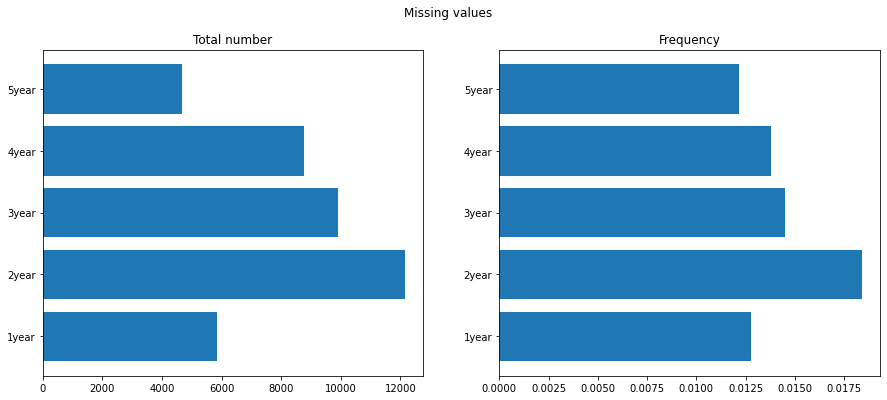

In [321]:
missing_val = {k:(v == '?').sum().sum() for k,v in dataset.items()}
freq =  {k:(v == '?').sum().sum() / np.multiply(*v.shape) for k,v in dataset.items()}

f, ax = plt.subplots(1,2, figsize=(15,6))
f.suptitle('Missing values')
ax[0].barh(list(missing_val.keys()), missing_val.values())
ax[0].set_title('Total number')
ax[1].barh(list(freq.keys()), freq.values())
ax[1].set_title('Frequency')

#### For the nth year

In [257]:
n = 3
pd.options.display.max_rows = 100

#### Per variable

Text(0.5, 1.0, 'Number of missing values per variable in the 3th dataset')

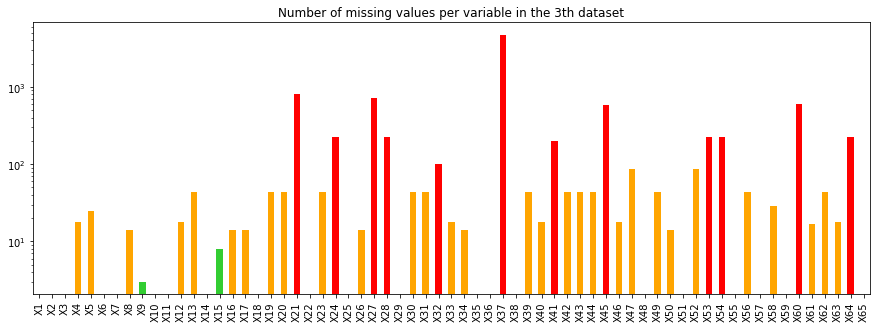

In [281]:
missing = (dataset[f'{n}year'] == '?')
color = ['r' if x > 100 else ('orange' if x > 10 else 'limegreen') for x in missing.sum(axis=0)]
missing.sum(axis=0).plot(kind='bar', figsize=(15,5), log=True, color=color)
plt.title(f'Number of missing values per variable in the {n}th dataset')

In [259]:
missing_col = pd.DataFrame({'missing values': missing.sum(axis=0).values}, index = missing.columns.values)
missing_col.sort_values('missing values', ascending=False).style.background_gradient(cmap='Blues', vmax=500, vmin=20, low=0.1)

,missing values
X37,4736
X21,807
X27,715
X60,592
X45,591
X28,228
X53,228
X54,228
X64,228
X24,227


#### Per company

Text(0.5, 1.0, 'Max number of missing values per row')

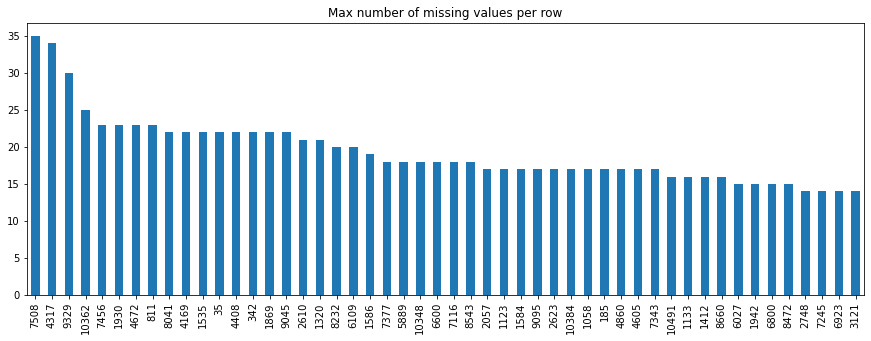

In [260]:
missing.sum(axis=1).sort_values(ascending=False).head(50).plot(kind='bar', figsize=(15,5))
plt.title('Max number of missing values per row')

Let's remove variables and companies with many missing values

In [261]:
useless_col = missing.sum(axis=0)[missing.sum(axis=0) >= 25]
useless_col.name = 'Useless variables'
useless_col

X5       25
X13      43
X19      43
X20      43
X21     807
X23      43
X24     227
X27     715
X28     228
X30      43
X31      43
X32     101
X37    4736
X39      43
X41     202
X42      43
X43      43
X44      43
X45     591
X47      86
X49      43
X52      86
X53     228
X54     228
X56      43
X58      29
X60     592
X62      43
X64     228
Name: Useless variables, dtype: int64

In [262]:
missing.drop(columns=useless_col.index, inplace=True)

In [263]:
useless_row = missing.sum(axis=1)[missing.sum(axis=1) >= 5]
useless_row.name = 'Useless companies'
len(useless_row)

18

In [264]:
missing.drop(index=useless_row.index, inplace=True)

In [265]:
missing.shape

(10484, 36)

In [269]:
missing.sum().sum()

20